# Gradient Boosting

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
np.random.seed(43)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:,0]**2 + 0.05 * np.random.randn(100)

In [3]:
df = pd.DataFrame()

In [7]:
df['X'] = X.reshape(100)
df['y'] = y 

In [14]:
df

,X,y
0,-0.384945,0.443350
1,0.109067,-0.012387
2,-0.366609,0.398578
3,-0.259410,0.190695
4,-0.172861,0.131287
...,...,...
95,-0.065322,0.088239
96,0.385899,0.497400
97,-0.244954,0.182159
98,-0.056687,0.071266


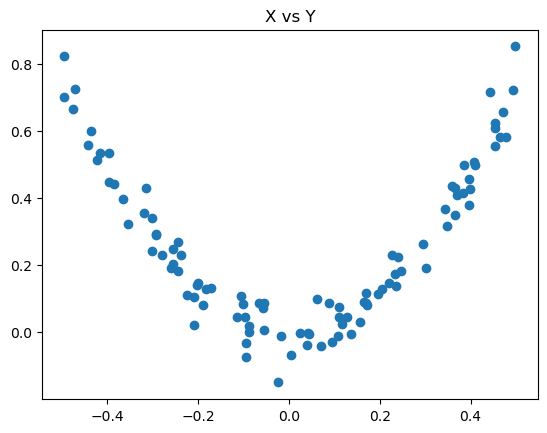

In [16]:
plt.scatter(df['X'], df['y'])
plt.title('X vs Y');

In [17]:
df['pred1'] = df['y'].mean()

In [18]:
df

,X,y,pred1
0,-0.384945,0.443350,0.256893
1,0.109067,-0.012387,0.256893
2,-0.366609,0.398578,0.256893
3,-0.259410,0.190695,0.256893
4,-0.172861,0.131287,0.256893
...,...,...,...
95,-0.065322,0.088239,0.256893
96,0.385899,0.497400,0.256893
97,-0.244954,0.182159,0.256893
98,-0.056687,0.071266,0.256893


In [19]:
df['res1'] = df['y'] - df['pred1']

In [20]:
df

,X,y,pred1,res1
0,-0.384945,0.443350,0.256893,0.186457
1,0.109067,-0.012387,0.256893,-0.269280
2,-0.366609,0.398578,0.256893,0.141685
3,-0.259410,0.190695,0.256893,-0.066198
4,-0.172861,0.131287,0.256893,-0.125605
...,...,...,...,...
95,-0.065322,0.088239,0.256893,-0.168654
96,0.385899,0.497400,0.256893,0.240508
97,-0.244954,0.182159,0.256893,-0.074734
98,-0.056687,0.071266,0.256893,-0.185627


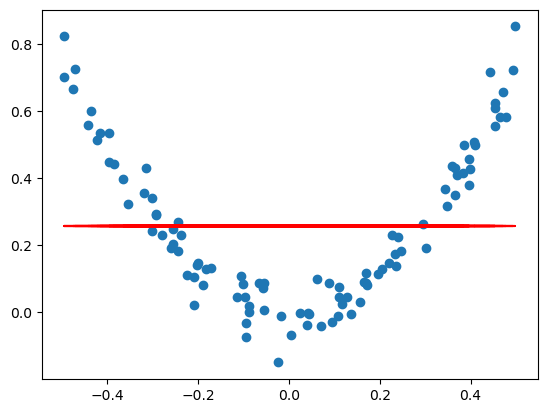

In [21]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red');

In [22]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [23]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

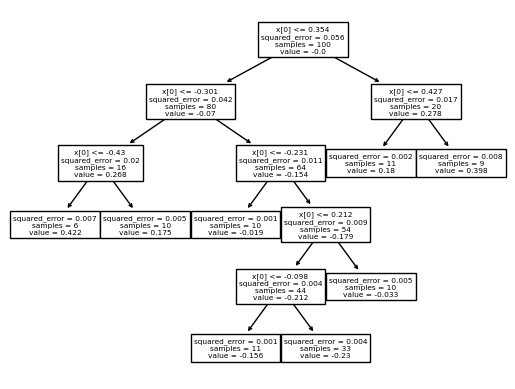

In [24]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [65]:
df = pd.read_csv('profit.csv')
df

,RND,Administration,Marketing_Spend,Profit
0,165,137,472,192
1,101,92,250,144
2,29,127,201,91


In [66]:
df['f0(x)'] = df['Profit'].mean()

In [67]:
df

,RND,Administration,Marketing_Spend,Profit,f0(x)
0,165,137,472,192,142.333333
1,101,92,250,144,142.333333
2,29,127,201,91,142.333333


In [68]:
df['r1'] = df['Profit'] - df['f0(x)']

In [69]:
df

,RND,Administration,Marketing_Spend,Profit,f0(x),r1
0,165,137,472,192,142.333333,49.666667
1,101,92,250,144,142.333333,1.666667
2,29,127,201,91,142.333333,-51.333333


In [71]:
from sklearn.tree import DecisionTreeRegressor
dt1 = DecisionTreeRegressor(max_depth=1)

In [74]:
dt1.fit(df.iloc[:, 0:3].values, df.iloc[:, -1].values )

DecisionTreeRegressor(max_depth=1)

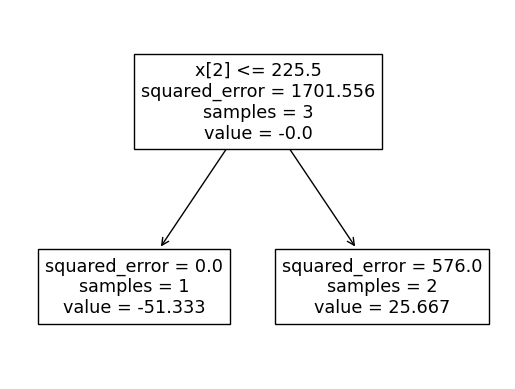

In [76]:
from sklearn.tree import plot_tree
plot_tree(dt1);